# Assignment 4: Simulating Income
## Kevin Sun
## November 6, 2017
## MACS30000 (Perspectives in Computational Analysis)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

 ### Question 1


In [12]:
def income_sim(x):
    
    p = {
    "start_income" : 80000,
    "growth" : 0.03,
    "sigma" : 0.1,
    "mu" : 0.0,
    "rho" : 0.2,
    "work_years" : 40,
    "num_draws" : 10000,
    }
    
    #set random seed
    np.random.seed(8)
    
    errors = np.random.normal(p["mu"], p["sigma"], (p["work_years"], p["num_draws"]))
    
    # Create matrix of dimension (work_years, num_draws)
    ln_income_matrix = np.zeros((p["work_years"], p["num_draws"]))
    
    #fill the matrix
    ln_income_matrix[0, :] = np.log(p["start_income"]) + errors[0, :]
    
    #Loop through model
    for year in range(1, p["work_years"]):
        ln_income_matrix[year, :] = (1 - p["rho"]) * (np.log(p["start_income"]) \
                                     + p["growth"] * (year - 0)) + (p["rho"] * ln_income_matrix[year - 1, :]) \
                                     + errors[year, :]
    income_matrix = np.exp(ln_income_matrix)
    return income_matrix

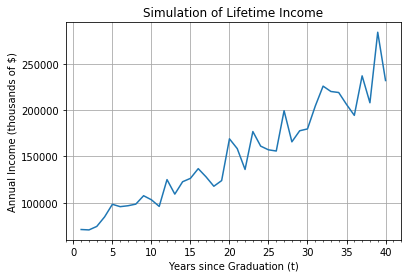

In [13]:
simulation_profile = {
    "start_income" : 80000,
    "growth" : 0.03,
    "sigma" : 0.1,
    "mu" : 0.0,
    "rho" : 0.2,
    "work_years" : 40,
    "num_draws" : 10000,
    }

income_matrix = income_sim(simulation_profile)


#Plotting one lifetime income path

%matplotlib inline
p = simulation_profile
year_x_axis = np.arange(1, p["work_years"] + 1)
chosen_year = 10
fig, ax = plt.subplots()
plt.plot(year_x_axis, income_matrix[:, chosen_year])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Simulation of Lifetime Income')
plt.xlabel('Years since Graduation (t)')
plt.ylabel('Annual Income (thousands of $)')

### Question 2

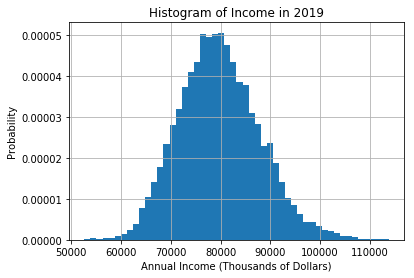

What percentage of the class will earn more than $100,000 in t = 1?
1.42 %
What percentage of the class will earn less than $70,000 in t = 1?
9.32 %
Is the distribution normally distributed?
The distribution is slightly skewed to the right


In [14]:
# Plotting Histogram 
%matplotlib inline

income_matrix = income_sim(simulation_profile)
starting_salary = income_matrix[0, :]

hist, bins = np.histogram(starting_salary, bins=50, density=True)
widths = np.diff(bins)
plt.grid(True)
plt.xlabel('Annual Income (Thousands of Dollars)')
plt.ylabel('Probability')
plt.title('Histogram of Income in 2019')
plt.bar(bins[:-1], hist, widths)
plt.show()

print("What percentage of the class will earn more than $100,000 in t = 1?")
h = starting_salary[starting_salary >= 100000].shape[0]/100.0
print(h, "%")
print("What percentage of the class will earn less than $70,000 in t = 1?")
l = starting_salary[starting_salary <= 70000].shape[0]/100.0
print(l, "%")

print("Is the distribution normally distributed?")
print("The distribution is slightly skewed to the right")

### Question 3


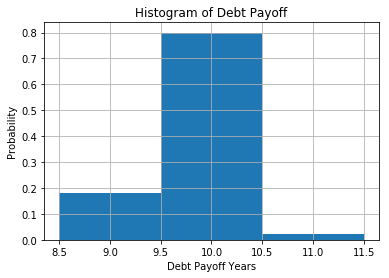

17.93 % of students will pay off their debt within 10 years


In [15]:
#Creating a matrix to track debt payments
income_matrix = income_sim(simulation_profile)
debt_payoff_matrix = np.zeros((p["work_years"], p["num_draws"]))
debt_payoff_matrix[0, :] = income_matrix[0, :] * 0.1

#looping through debt matrix
for year in range(1, p["work_years"]):
    debt_payoff_matrix[year, :] = income_matrix[year, :] * 0.1 + debt_payoff_matrix[year - 1, :]

payoff_list = []
for column in range(p["num_draws"]):
    payoff_list.append(np.searchsorted(debt_payoff_matrix[:, column], 95000))

hist, bins = np.histogram(payoff_list, bins=3, range=(9, 12), density=True)
widths = np.diff(bins)
plt.grid(True)
plt.xlabel('Debt Payoff Years')
plt.ylabel('Probability')
plt.title('Histogram of Debt Payoff')
plt.bar(bins[:-1], hist, widths)
plt.show()

payoff_array = np.array(payoff_list)
payoff_array[payoff_array <10]
x = len(payoff_array[payoff_array <10])/10000.0
print(x * 100, "% of students will pay off their debt within 10 years")

### Question 4

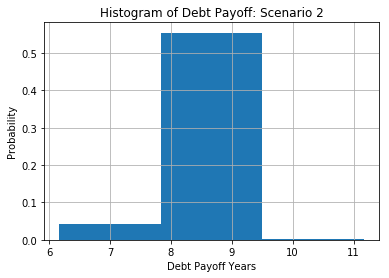

70.04 % of students will pay off their debt within 10 years


In [16]:
def income_sim(x):
    
    p = {
    "start_income" : 85000,
    "growth" : 0.03,
    "sigma" : 0.15,
    "mu" : 0.0,
    "rho" : 0.2,
    "work_years" : 40,
    "num_draws" : 10000,
    }
    
    #set random seed
    np.random.seed(8)
    
    errors = np.random.normal(p["mu"], p["sigma"], (p["work_years"], p["num_draws"]))
    
    # Create matrix of dimension (work_years, num_draws)
    ln_income_matrix = np.zeros((p["work_years"], p["num_draws"]))
    
    #fill the matrix
    ln_income_matrix[0, :] = np.log(p["start_income"]) + errors[0, :]
    
    #Loop through model
    for year in range(1, p["work_years"]):
        ln_income_matrix[year, :] = (1 - p["rho"]) * (np.log(p["start_income"]) \
                                     + p["growth"] * (year - 0)) + (p["rho"] * ln_income_matrix[year - 1, :]) \
                                     + errors[year, :]
    income_matrix = np.exp(ln_income_matrix)
    return income_matrix

simulation_profile_2 = {
    "start_income_2" : 85000,
    "growth" : 0.03,
    "sigma_2" : 0.15,
    "mu" : 0.0,
    "rho" : 0.2,
    "work_years" : 40,
    "num_draws" : 10000,
    }

income_matrix = income_sim(simulation_profile_2)

#Creating a matrix to track debt payments
income_matrix = income_sim(simulation_profile_2)
debt_payoff_matrix = np.zeros((p["work_years"], p["num_draws"]))
debt_payoff_matrix[0, :] = income_matrix[0, :] * 0.1

#looping through debt matrix
for year in range(1, p["work_years"]):
    debt_payoff_matrix[year, :] = income_matrix[year, :] * 0.1 + debt_payoff_matrix[year - 1, :]

payoff_list = []
for column in range(p["num_draws"]):
    payoff_list.append(np.searchsorted(debt_payoff_matrix[:, column], 95000))

hist, bins = np.histogram(payoff_list, bins=3, range=(7, 12), density=True)
widths = np.diff(bins)
plt.grid(True)
plt.xlabel('Debt Payoff Years')
plt.ylabel('Probability')
plt.title('Histogram of Debt Payoff: Scenario 2')
plt.bar(bins[:-1], hist, widths)
plt.show()

payoff_array = np.array(payoff_list)
payoff_array[payoff_array <10]
x = len(payoff_array[payoff_array <10])/10000.0
print(x * 100, "% of students will pay off their debt within 10 years")
